# Model  Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
training_data = pd.read_csv('training_data.csv',sep=':',delimiter=None)
test_data = pd.read_csv('test.csv',sep=':',delimiter=None)

In [5]:
training_data.head(20)

,x,x2,y
0,-0.228788,-2.287877,3.506056
1,-0.094669,-0.946690,0.782723
2,-0.956651,-9.566513,3.045309
3,-1.984509,-19.845088,3.063300
4,0.386115,3.861152,5.548161
5,-0.923587,-9.235870,2.953078
6,-2.930025,-29.300250,2.575206
7,-0.599230,-5.992298,2.810089
8,0.186803,1.868033,2.135611
9,-0.618211,-6.182106,3.100131


In [4]:
training_data.tail(5)

,x,x2,y
995,6.090780,60.907804,6.994628
996,6.404440,64.044398,10.341862
997,6.759155,67.591547,8.604072
998,7.696100,76.960998,9.130374
999,7.035916,70.359157,7.827138


In [5]:
training_data.isnull().sum()

x     2
x2    2
y     2
dtype: int64

# Basis Statistics of Data-Set

In [6]:
training_data.describe()

,x,x2,y
count,998.000000,998.000000,998.000000
mean,3.496300,34.963000,5.641535
std,3.270797,32.707971,2.696431
min,-3.444108,-34.441079,-0.075518
25%,0.118074,1.180740,3.432217
50%,4.011380,40.113800,5.081093
75%,6.306373,63.063733,8.294083
max,9.846538,98.465379,11.521694


In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       998 non-null    float64
 1   x2      998 non-null    float64
 2   y       998 non-null    float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
corr_matrix = training_data.corr()
corr_matrix['y'].sort_values(ascending=False)

y     1.000000
x2    0.837319
x     0.837319
Name: y, dtype: float64

# Dealing With Missing Values 

In [9]:
training_data = training_data.fillna(np.mean(training_data))

In [10]:
training_data.isnull().sum()

x     0
x2    0
y     0
dtype: int64

In [11]:
features = ['x']
target = ['y']
X_train = training_data[features]
Y_train  = training_data[target]


# Training of the model Using  Regression  Models

In [12]:
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

In [22]:
from sklearn.metrics import mean_squared_error
models =[]
models.append(('LR',LinearRegression()))
#models.append(('DT',DecisionTreeRegressor()))
#models.append(('RF',RandomForestRegressor()))
#evaluate each model in turn 
results = []
names = []
print(models)
for name,model in models:
    clf=model
    clf.fit(X_train,Y_train)
    predict_value = clf.predict(test_data[features])
    mse = mean_squared_error(test_data[target], predict_value)
    rmse = np.sqrt(mse)
    results.append(rmse)
    names.append(name)
    msg = f"{name}: RMSE  = {(rmse):0.5f} "
    print(msg)

[('LR', LinearRegression())]
LR: RMSE  = 1.44302 


In [14]:
clf.coef_


array([[0.69028259]])

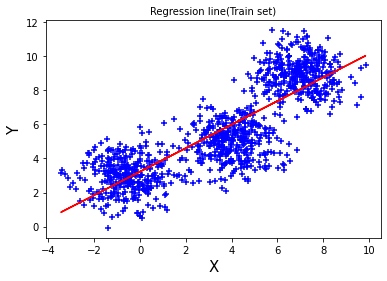

In [15]:
Y0 = clf.intercept_ + clf.coef_*X_train

# plotting on train data
plt.scatter(X_train,Y_train,color='blue',marker='+')
plt.plot(X_train,Y0,color='red')
plt.xlabel("X",fontsize=15)
plt.ylabel("Y",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [31]:
y = clf.predict(2.reshape(-1, 1))

SyntaxError: invalid syntax (3207341274.py, line 1)

In [33]:
predict_value = clf.predict(np.array(2).reshape(-1, 1))

In [34]:
predict_value

array([[4.60866569]])